In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# KEGG Mean Ratios

- Compute the mean KEGG for each HE, LS, CD, and UC cohort
- Compute the ratio of the mean KEGG for LS, CD, and UC against HE
- Viusalize ratios
- Visualize only "extreme" ratios

In [2]:
df = pd.read_csv("../data/keggs-subjects-rf-scores.csv")

In [3]:
df.columns

Index(['kegg', 'over.abundant.health.conf', 'LS001', 'LS002', 'LS003', 'LS004',
       'LS005', 'LS006', 'LS007', 'CD.SRS301865', 'CD.SRS301866',
       'CD.SRS301867', 'CD.SRS301868', 'CD.SRS301869', 'CD.SRS301870',
       'CD.SRS301871', 'CD.SRS301872', 'CD.SRS301873', 'CD.SRS301874',
       'CD.SRS301875', 'CD.SRS301876', 'CD.SRS301877', 'CD.SRS301878',
       'CD.SRS301879', 'UC.SRS071964', 'UC.SRS071970', 'UC.SRS071978',
       'UC.SRS071981', 'UC.SRS071982', 'UC.SRS071988', 'HE.SRS011061',
       'HE.SRS011084', 'HE.SRS011134', 'HE.SRS011239', 'HE.SRS011271',
       'HE.SRS011302', 'HE.SRS011405', 'HE.SRS011452', 'HE.SRS011529',
       'HE.SRS011586', 'HE.SRS012273', 'HE.SRS012902', 'HE.SRS013158',
       'HE.SRS013215', 'HE.SRS013687', 'HE.SRS013951', 'HE.SRS014235',
       'HE.SRS014923', 'HE.SRS014979', 'HE.SRS015065', 'HE.SRS015217',
       'HE.SRS015578', 'HE.SRS015663', 'HE.SRS016018', 'HE.SRS016095',
       'HE.SRS016335', 'HE.SRS016495', 'HE.SRS017103', 'HE.SRS017433',
  

In [4]:
laplace_scale = 1e-9

In [5]:
HE_df = df.filter(regex=("HE.*"))
LS_df = df.filter(regex=("LS.*"))
UC_df = df.filter(regex=("UC.*"))
CD_df = df.filter(regex=("CD.*"))

HE_mean = HE_df.apply(lambda x: 10**np.mean(np.log10(x+laplace_scale)), axis = 1)
LS_mean = LS_df.apply(lambda x: 10**np.mean(np.log10(x+laplace_scale)), axis = 1)
UC_mean = UC_df.apply(lambda x: 10**np.mean(np.log10(x+laplace_scale)), axis = 1)
CD_mean = CD_df.apply(lambda x: 10**np.mean(np.log10(x+laplace_scale)), axis = 1)

In [6]:
LS_HE_mean = LS_mean/HE_mean
UC_HE_mean = UC_mean/HE_mean
CD_HE_mean = CD_mean/HE_mean

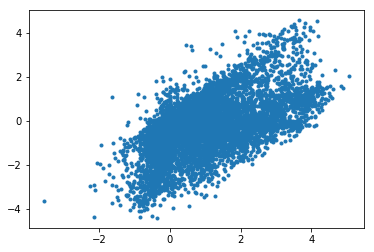

In [7]:
plt.plot(np.log10(LS_HE_mean), np.log10(CD_HE_mean), '.');

In [8]:
import plotly.plotly as py
import plotly.graph_objs as go

import plotly.offline as offline
import plotly.plotly as py
from plotly.graph_objs import *




from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

offline.init_notebook_mode()

In [9]:
x, y, z = np.random.multivariate_normal(np.array([0,0,0]), np.eye(3), 200).transpose()
trace1 = go.Scatter3d(
    x=np.log10(LS_HE_mean),
    y=np.log10(CD_HE_mean),
    z=np.log10(UC_HE_mean),
    text = list(df.kegg),
    mode='markers',
    marker=dict(
        size=12,
        line=dict(
            color='rgba(217, 217, 217, 0.14)',
            width=0.5
        ),
        opacity=0.8
    )
)


data = [trace1]
layout = go.Layout(
                    scene = dict(
                    xaxis = dict(
                        title='x: LS to HE ratio'),
                    yaxis = dict(
                        title='y: CD to HE ratio'),
                    zaxis = dict(
                        title='z: UC to HE ratio'),),
                    width=700,
                    margin=dict(
        l=-50,
        r=0,
        b=0,
        t=0)
                  )
fig = go.Figure(data=data, layout=layout)


In [10]:
iplot(fig, filename='temp')
# mean ratios

In [11]:
df_mean_ratios = pd.DataFrame({"LS_HE_mean_ratio": LS_HE_mean, 
                                 "CD_HE_mean_ratio": CD_HE_mean, 
                                 "UC_HE_mean_ratio": UC_HE_mean, 
                                 "KEGG_names": df.kegg})

df_mean_ratios.to_csv("../results/KEGG-mean-HE-ratios-03-01-2018.csv", index = False)

In [12]:

#
# select KEGGs that are outside the "box" (ball in max norm) of KEGGs of radius 1.0
# compute the max norm over all keggs for the 3 different cohort ratios
#
radius = 4
kegg_magnitudes = np.max([np.abs(np.log10(LS_HE_mean)),np.abs(np.log10(CD_HE_mean)),np.abs(np.log10(UC_HE_mean))], axis = 0)
print("number of keggs that are 5*10X more different", len(np.where(kegg_magnitudes > radius)[0]))

number of keggs that are 5*10X more different 140


In [13]:
x, y, z = np.random.multivariate_normal(np.array([0,0,0]), np.eye(3), 200).transpose()
trace1 = go.Scatter3d(
    x=np.log10(LS_HE_mean[np.where(kegg_magnitudes > radius)[0]]),
    y=np.log10(CD_HE_mean[np.where(kegg_magnitudes > radius)[0]]),
    z=np.log10(UC_HE_mean[np.where(kegg_magnitudes > radius)[0]]),
    text = list(df.kegg[np.where(kegg_magnitudes > radius)[0]]),
    mode='markers',
    marker=dict(
        size=12,
        line=dict(
            color='rgba(217, 217, 217, 0.14)',
            width=0.5
        ),
        opacity=0.8
    )
)


data = [trace1]
layout = go.Layout(
                    scene = dict(
                    xaxis = dict(
                        title='x: LS to HE ratio'),
                    yaxis = dict(
                        title='y: CD to HE ratio'),
                    zaxis = dict(
                        title='z: UC to HE ratio'),),
                    width=700,
                    margin=dict(
        l=-50,
        r=0,
        b=0,
        t=0)
                  )
fig = go.Figure(data=data, layout=layout)


In [14]:
iplot(fig)

# selecting extreme (4x) KEGG mean ratios

In [15]:
df_extreme_ratios = pd.DataFrame({"LS_HE_mean_ratio": LS_HE_mean[np.where(kegg_magnitudes > radius)[0]], 
                                 "CD_HE_mean_ratio": CD_HE_mean[np.where(kegg_magnitudes > radius)[0]], 
                                 "UC_HE_mean_ratio": UC_HE_mean[np.where(kegg_magnitudes > radius)[0]], 
                                 "KEGG_names": df.kegg[np.where(kegg_magnitudes > radius)[0]]})

df_extreme_ratios.to_csv("../results/KEGG-extreme-HE-ratios-03-01-2018.csv", index = False)

In [16]:
df_extreme_ratios.shape

(140, 4)

In [17]:
df_lit = pd.read_table("../data/ibd_uc_cd_keggs.txt", header=None)
keggs_in_lit = list(df_lit.iloc[:,0])

In [18]:
def clean_kegg_names(input_keggs):
    return [kegg.split("(")[0] for kegg in input_keggs]



In [19]:
extreme_keggs = clean_kegg_names(list(df_extreme_ratios.KEGG_names))

In [20]:
set(keggs_in_lit).intersection(set(extreme_keggs))

{'K00247'}

In [21]:
## zero in two cohorts, but not the other

In [22]:
def get_cohort_significant_keggs(cohort, cohort_comparison_1, cohort_comparison_2, kegg_names):
    '''
    cohort: ratios of cohort of interest
    cohort_comparison_1: ratios of first cohort to compare to
    cohort_comparison_2: ratios of second cohort to compare to
    kegg_names: list of kegg names to get the kegg names out
    
    '''
    indx_where_comparison_cohorts_ratio_1 = np.where((cohort_comparison_1 == 1) & (cohort_comparison_2 == 1))[0]
    cohort_where_comparison_cohorts_ratio_1 = np.array(cohort[indx_where_comparison_cohorts_ratio_1])
    kegg_names_where_comparison_cohorts_ratio_1 = np.array(kegg_names[indx_where_comparison_cohorts_ratio_1])
    
    indx_cohort_significant = np.where(cohort_where_comparison_cohorts_ratio_1 != 1)[0]
    LS_significant = pd.Series(cohort_where_comparison_cohorts_ratio_1[indx_cohort_significant])
    significant_cohort_keggs = kegg_names_where_comparison_cohorts_ratio_1[indx_cohort_significant]
    
    return list(LS_significant), list(significant_cohort_keggs)

In [23]:
LS_significant, LS_sig_KEGGs = get_cohort_significant_keggs(LS_HE_mean, 
                                                            UC_HE_mean, 
                                                            CD_HE_mean, 
                                                            kegg_names=df.kegg)

CD_significant, CD_sig_KEGGs = get_cohort_significant_keggs(CD_HE_mean, 
                                                            UC_HE_mean, 
                                                            LS_HE_mean, 
                                                            kegg_names=df.kegg)

UC_significant, UC_sig_KEGGs = get_cohort_significant_keggs(UC_HE_mean, 
                                                            LS_HE_mean, 
                                                            CD_HE_mean, 
                                                            kegg_names=df.kegg)



In [24]:
len(UC_significant)

69

In [25]:
df_LS_sig = df_mean_ratios[df_mean_ratios["KEGG_names"].isin(LS_sig_KEGGs)]
df_UC_sig = df_mean_ratios[df_mean_ratios["KEGG_names"].isin(UC_sig_KEGGs)]
df_CD_sig = df_mean_ratios[df_mean_ratios["KEGG_names"].isin(CD_sig_KEGGs)]

df_sig = pd.concat([df_LS_sig, df_UC_sig, df_CD_sig])

df_sig.to_csv("../results/discriminative-KEGGs-mean-HE-ratios-03-01-2018.csv", index=False)

In [26]:
x, y, z = np.random.multivariate_normal(np.array([0,0,0]), np.eye(3), 200).transpose()
trace1 = go.Scatter3d(
    x=np.log10(df_sig.LS_HE_mean_ratio),
    y=np.log10(df_sig.CD_HE_mean_ratio),
    z=np.log10(df_sig.UC_HE_mean_ratio),
    text = list(df_sig.KEGG_names),
    mode='markers',
    marker=dict(
        size=12,
        line=dict(
            color='rgba(217, 217, 217, 0.14)',
            width=0.5
        ),
        opacity=0.8
    )
)


data = [trace1]
layout = go.Layout( scene = dict(
                    xaxis = dict(
                        title='x: LS to HE ratio'),
                    yaxis = dict(
                        title='y: CD to HE ratio'),
                    zaxis = dict(
                        title='z: UC to HE ratio'),),
                    width=700,
                    margin=dict(
        l=-50,
        r=0,
        b=0,
        t=0)
                  )
fig = go.Figure(data=data, layout=layout)



In [27]:
iplot(fig)

In [28]:
df[df["kegg"].isin(LS_sig_KEGGs)].shape

(347, 65)

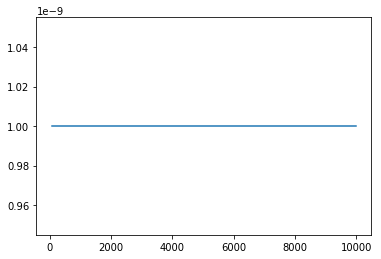

In [29]:
plt.plot(HE_mean[df["kegg"].isin(LS_sig_KEGGs)]);

In [30]:
HE_df[df["kegg"].isin(LS_sig_KEGGs)].head()

HE.SRS011061  HE.SRS011084  HE.SRS011134  HE.SRS011239  HE.SRS011271  \
67            0.0           0.0           0.0           0.0           0.0   
94            0.0           0.0           0.0           0.0           0.0   
189           0.0           0.0           0.0           0.0           0.0   
226           0.0           0.0           0.0           0.0           0.0   
258           0.0           0.0           0.0           0.0           0.0   

     HE.SRS011302  HE.SRS011405  HE.SRS011452  HE.SRS011529  HE.SRS011586  \
67            0.0           0.0           0.0           0.0           0.0   
94            0.0           0.0           0.0           0.0           0.0   
189           0.0           0.0           0.0           0.0           0.0   
226           0.0           0.0           0.0           0.0           0.0   
258           0.0           0.0           0.0           0.0           0.0   

             ...           HE.SRS016335  HE.SRS016495  HE.SRS017103  \
67           ...                    0.0           0.0           0.0   
94           ...                    0.0           0.0           0.0   
189          ...                    0.0           0.0           0.0   
226          ...                    0.0           0.0           0.0   
258          ...                    0.0           0.0           0.0   

     HE.SRS017433  HE.SRS018427  HE.SRS018656  HE.SRS020328  HE.SRS020869  \
67            0.0           0.0           0.0           0.0           0.0   
94            0.0           0.0           0.0           0.0           0.0   
189           0.0           0.0           0.0           0.0           0.0   
226           0.0           0.0           0.0           0.0           0.0   
258           0.0           0.0           0.0           0.0           0.0   

     HE.SRS022713  HE.SRS016585.suspect  
67            0.0                   0.0  
94            0.0                   0.0  
189           0.0                   0.0  
226           0.0                   0.0  
258           0.0                   0.0  

[5 rows x 35 columns]

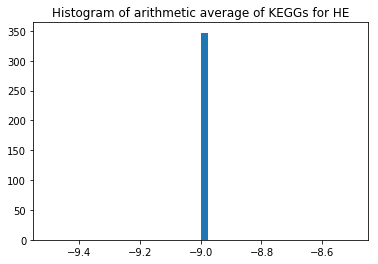

In [31]:
plt.hist(np.mean(np.log10(1e-9 + HE_df[df["kegg"].isin(LS_sig_KEGGs)]), axis = 1), bins=40);
plt.title("Histogram of arithmetic average of KEGGs for HE");

In [32]:
HE_df[df["kegg"].isin(LS_sig_KEGGs)].shape

(347, 35)

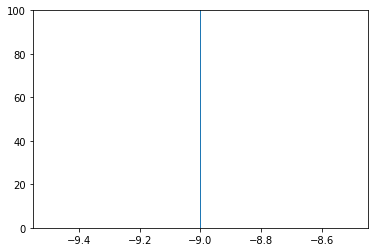

In [33]:
plt.hist(np.reshape(np.array(np.log10(1e-9 + HE_df[df["kegg"].isin(LS_sig_KEGGs)])), (347*35, 1)), bins=500);
#plt.xlim((-9,-1));
plt.ylim((0,100));

In [34]:
HE_df[df["kegg"].isin(LS_sig_KEGGs)].head()

HE.SRS011061  HE.SRS011084  HE.SRS011134  HE.SRS011239  HE.SRS011271  \
67            0.0           0.0           0.0           0.0           0.0   
94            0.0           0.0           0.0           0.0           0.0   
189           0.0           0.0           0.0           0.0           0.0   
226           0.0           0.0           0.0           0.0           0.0   
258           0.0           0.0           0.0           0.0           0.0   

     HE.SRS011302  HE.SRS011405  HE.SRS011452  HE.SRS011529  HE.SRS011586  \
67            0.0           0.0           0.0           0.0           0.0   
94            0.0           0.0           0.0           0.0           0.0   
189           0.0           0.0           0.0           0.0           0.0   
226           0.0           0.0           0.0           0.0           0.0   
258           0.0           0.0           0.0           0.0           0.0   

             ...           HE.SRS016335  HE.SRS016495  HE.SRS017103  \
67           ...                    0.0           0.0           0.0   
94           ...                    0.0           0.0           0.0   
189          ...                    0.0           0.0           0.0   
226          ...                    0.0           0.0           0.0   
258          ...                    0.0           0.0           0.0   

     HE.SRS017433  HE.SRS018427  HE.SRS018656  HE.SRS020328  HE.SRS020869  \
67            0.0           0.0           0.0           0.0           0.0   
94            0.0           0.0           0.0           0.0           0.0   
189           0.0           0.0           0.0           0.0           0.0   
226           0.0           0.0           0.0           0.0           0.0   
258           0.0           0.0           0.0           0.0           0.0   

     HE.SRS022713  HE.SRS016585.suspect  
67            0.0                   0.0  
94            0.0                   0.0  
189           0.0                   0.0  
226           0.0                   0.0  
258           0.0                   0.0  

[5 rows x 35 columns]